## 이미지 데이터 + 비지도학습 분류
---
- 이미지 데이터 정보 : 100*100, 흑백 이미지

In [7]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

In [44]:
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.utils import set_random_seed, plot_model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split

## [1] 데이터 로딩 및 전처리

In [2]:
FILE='./file/fruits_300.npy'

In [3]:
fruits=np.load(FILE)

In [4]:
fruits.shape

(300, 100, 100)

In [5]:
fruits_2d=fruits.reshape(-1, fruits.shape[1]*fruits.shape[2])

In [20]:
# 스케일링
fruits=fruits/255.0
fruits_2d=fruits_2d/255.0

In [6]:
fruits_2d.shape

(300, 10000)

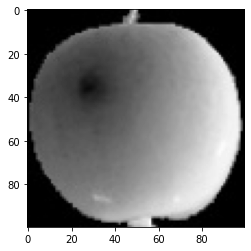

In [23]:
plt.imshow(fruits[1], cmap='gray')

In [24]:
np.unique(fruits[0])

array([0.00392157, 0.00784314, 0.01176471, 0.01568627, 0.01960784,
       0.02352941, 0.02745098, 0.03137255, 0.03529412, 0.03921569,
       0.04313725, 0.04705882, 0.05098039, 0.05490196, 0.05882353,
       0.0627451 , 0.06666667, 0.07058824, 0.0745098 , 0.07843137,
       0.08235294, 0.08627451, 0.09019608, 0.09411765, 0.09803922,
       0.10196078, 0.10588235, 0.10980392, 0.11372549, 0.11764706,
       0.12156863, 0.1254902 , 0.12941176, 0.13333333, 0.1372549 ,
       0.14117647, 0.14509804, 0.14901961, 0.15294118, 0.15686275,
       0.16078431, 0.16470588, 0.16862745, 0.17254902, 0.17647059,
       0.18039216, 0.18431373, 0.18823529, 0.19215686, 0.19607843,
       0.2       , 0.20392157, 0.20784314, 0.21176471, 0.21568627,
       0.21960784, 0.22352941, 0.22745098, 0.23137255, 0.23529412,
       0.23921569, 0.24313725, 0.24705882, 0.25098039, 0.25490196,
       0.25882353, 0.2627451 , 0.26666667, 0.27058824, 0.2745098 ,
       0.27843137, 0.28235294, 0.28627451, 0.29019608, 0.29411

## [2] 데이터 처리 : K-Means

In [31]:
iner=[]
for i in range(2, 16):
    km=KMeans(n_clusters=i, random_state=42)
    km.fit(fruits_2d)
    iner.append(km.inertia_)
    
    print('='*70)
    print(f'num = {i}')
    # Cluster 객체 속성 확인
    print(f'cluster_centers_ : {km.cluster_centers_}')
    print(f'labels_ : {km.labels_}')
    print(f'labels_ Counts : {np.unique(km.labels_, return_counts=True)}')
    print(f'inertia_ : {km.inertia_}')
    print(f'n_iter_ : {km.n_iter_}')
    print()
    

num = 2
cluster_centers_ : [[0.00394108 0.00394108 0.00394108 ... 0.00392157 0.00392157 0.00392157]
 [0.00431769 0.00419885 0.00431769 ... 0.00392157 0.00392157 0.00392157]]
labels_ : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]
labels_ Counts : (array([0, 1]), array([201,  99], dtype=int64))
inertia_ : 90065.85999205102
n_iter_ : 3

num = 3
cluster_centers_ : [[0.00392157 0.00392157 0.00392157 ... 0.00392157 0.00392157 0.00392157]

num = 9
cluster_centers_ : [[0.00402212 0.00402212 0.00402212 ... 0.00392157 0.00392157 0.00392157]
 [0.00392157 0.00392157 0.00392157 ... 0.00392157 0.00392157 0.00392157]
 [0.00392157 0.00392157 0.00392157 ... 0.00392157 0.00392157 0.00392157]
 ...
 [0.00392157 0.00392157 0.00392157 ... 0.00392157 0.00392157 0.00392157]
 [0.00392157 0.00392157 0.00392157 ... 0.00392157 0.00392157 0.00392157]
 [0.00448179 0.0047619  0.0047619  ... 0.00392157 0.00392157 0.00392157]]
labels_ : [5 5 5 0 5 4 5 5 5 0 5 5 0 0 0 5 5 0 4 0 0 0 0 0 0 5 4 5 0 5 5 5 5 5 0 0 0
 0 0 0 5 0 4 5 4 0 5 5 5 5 5 0 4 5 5 0 5 5 0 5 0 5 4 4 0 5 5 0 5 0 5 5 4 5
 5 5 5 5 5 5 5 0 5 0 5 0 5 5 0 5 0 4 5 5 0 0 0 0 0 0 2 4 4 2 2 2 2 4 4 4 4
 2 4 4 4 2 4 4 2 4 4 2 2 4 4 2 4 2 4 2 4 2 4 2 4 4 2 2 2 4 4 4 4 4 2 2 4 4
 2 2 2 4 2 4 2 2 2 2 2 4 2 2 2 2 2 2 2 4 4 4 2 4 4 4 2 2 2 2 4 4 2 2 2 4 2
 2 2 2 2 4 4 2 4 2 4 2 4 4 2 4 1 1 3 1 8 8 1 6 7 3 6 7 7 7 8 6 3 3 3 1 3 3
 1 7 8 1 7 7 1 3 8 4 1 6 8 6 7 8 1 7 6 6 8 1 1 3 1 7 1 6 1 8 1 6 7 1 

num = 15
cluster_centers_ : [[0.00392157 0.00392157 0.00392157 ... 0.00392157 0.00392157 0.00392157]
 [0.00392157 0.00392157 0.00392157 ... 0.00392157 0.00392157 0.00392157]
 [0.00392157 0.00392157 0.00392157 ... 0.00392157 0.00392157 0.00392157]
 ...
 [0.00392157 0.00392157 0.00392157 ... 0.00392157 0.00392157 0.00392157]
 [0.00392157 0.00392157 0.00392157 ... 0.00392157 0.00392157 0.00392157]
 [0.00392157 0.00392157 0.00392157 ... 0.00392157 0.00392157 0.00392157]]
labels_ : [ 2  2  2  5  2  9  2  2  2  5  2  2  5  5  5  9  2  5  9  5  5  5  5  5
  5  2  9  2  5  2  2  2  2  2  5  5  5  5  5  5  2  5  9  2  9  5  2  2
  2  2  2  5  9  2  2  5  2  2  5  2  5  2  9  9  5  2  2  5  2  5  2  2
  9  2  2  2  2  2  2  2  2  5  2  5  2  5  2  2  5  2  5  9  2  2  5  5
  5  5  5  5  6 14  0  6  6  6  6 14 14  0 14  6 14 14 14  6 14 14  6  0
 14  6  6 14  0  6 14  6  0  6  0  6 14  6  0  0  6  6  6 14 14 14  0 14
  6  6 14  0  6  6  6  0  6 14  6  6  6  6  6  0  6  6  6  6  6  6  6  0
 14  0 

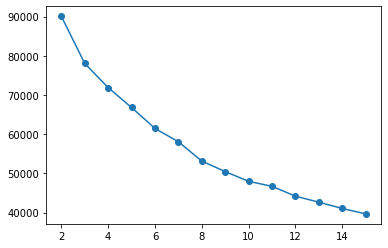

In [34]:
plt.plot(list(range(2, 16)), iner, marker='o')

군집 수는 3개로 결정

In [35]:
# n_clusters=3으로 KMeans 객체 생성하고 fit
km_last=KMeans(n_clusters=3, random_state=42)

In [37]:
km_last.fit(fruits_2d)

KMeans(n_clusters=3, random_state=42)

In [57]:
km_last.labels_.shape

(300,)

In [62]:
target=km_last.labels_

## [3] 딥러닝

In [63]:
# 데이터 분리
x_train, x_test, y_train, y_test=train_test_split(
fruits_2d, target, stratify=target, test_size=0.2, random_state=42)

In [79]:
x_train, x_val, y_train, y_val=train_test_split(
x_train, y_train, stratify=y_train, test_size=0.2, random_state=42)

In [88]:
def myModel(num):
    model=Sequential()
    model.add(Dense(units=num, activation='relu', input_shape=(10000, )))
    model.add(Dense(units=num, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(units=3, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics='accuracy')
    
    return model

In [89]:
model=myModel(100)

In [90]:
his=model.fit(x_train, y_train, epochs=10,
             validation_data=(x_val, y_val))

Epoch 1/10
6/6 [==============================] - 2s 95ms/step - loss: 2.0380 - accuracy: 0.3698 - val_loss: 0.6335 - val_accuracy: 0.6875
Epoch 2/10
6/6 [==============================] - 0s 18ms/step - loss: 0.8143 - accuracy: 0.6354 - val_loss: 0.3685 - val_accuracy: 0.7917
Epoch 3/10
6/6 [==============================] - 0s 20ms/step - loss: 0.4481 - accuracy: 0.8177 - val_loss: 0.3460 - val_accuracy: 0.8333
Epoch 4/10
6/6 [==============================] - 0s 24ms/step - loss: 0.3116 - accuracy: 0.8438 - val_loss: 0.1197 - val_accuracy: 0.9792
Epoch 5/10
6/6 [==============================] - 0s 26ms/step - loss: 0.2094 - accuracy: 0.9323 - val_loss: 0.0881 - val_accuracy: 0.9792
Epoch 6/10
6/6 [==============================] - 0s 22ms/step - loss: 0.1352 - accuracy: 0.9740 - val_loss: 0.1252 - val_accuracy: 0.9375
Epoch 7/10
6/6 [==============================] - 0s 22ms/step - loss: 0.1037 - accuracy: 0.9792 - val_loss: 0.0543 - val_accuracy: 0.9792
Epoch 8/10
6/6 [===========

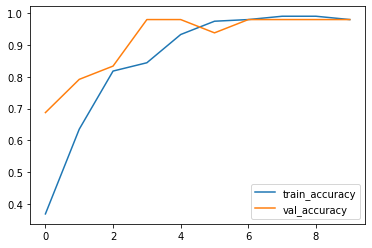

In [92]:
plt.plot(his.epoch, his.history['accuracy'], label='train_accuracy')
plt.plot(his.epoch, his.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

## [4] 모델 평가

In [93]:
model.evaluate(x_test, y_test)

2/2 [==============================] - 0s 9ms/step - loss: 0.0589 - accuracy: 0.9667


[0.05889181047677994, 0.9666666388511658]

## [5] 모델 예측

In [179]:
def get_pre(num):
    print(f'예측 : {np.round(model.predict(x_test[num].reshape(-1, 100*100)))}')
    print(f'정답 : {y_test[num]}')

In [180]:
for i in range(10):
    num=np.random.choice(np.array(x_test.shape[0]), size=1, replace=False)
    get_pre(num)
    print()

1/1 [==============================] - 0s 32ms/step
예측 : [[0. 1. 0.]]
정답 : [1]

1/1 [==============================] - 0s 33ms/step
예측 : [[0. 0. 1.]]
정답 : [2]

1/1 [==============================] - 0s 32ms/step
예측 : [[1. 0. 0.]]
정답 : [0]

1/1 [==============================] - 0s 32ms/step
예측 : [[0. 0. 1.]]
정답 : [2]

1/1 [==============================] - 0s 33ms/step
예측 : [[0. 1. 0.]]
정답 : [1]

1/1 [==============================] - 0s 33ms/step
예측 : [[1. 0. 0.]]
정답 : [0]

1/1 [==============================] - 0s 33ms/step
예측 : [[0. 0. 1.]]
정답 : [2]

1/1 [==============================] - 0s 36ms/step
예측 : [[1. 0. 0.]]
정답 : [0]

1/1 [==============================] - 0s 15ms/step
예측 : [[1. 0. 0.]]
정답 : [0]

1/1 [==============================] - 0s 16ms/step
예측 : [[0. 0. 1.]]
정답 : [2]

